<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer: 6 columns, 979 rows; 
# This data set is fairly complete as there are the same number of non-null values in eac column
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Check the data type of each column.

In [5]:
# Answer:, 1 float, 1 object, and 4 objects or strings
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [6]:
# Answer: 121 minutes
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer: Shortest = 64 minutes; longest = 242 minutes
location_shortest= movies.sort_values('duration', ascending=True).index[0]
location_longest= movies.sort_values('duration', ascending=True).index[978]

print('Shortest movie duration: ',movies['duration'].iloc[location_shortest])
print('Longest movie duration: ',movies['duration'].iloc[location_longest])


Shortest movie duration:  64
Longest movie duration:  242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


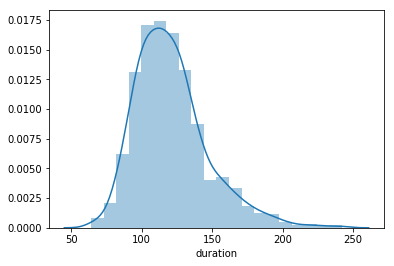

In [8]:
# Answer:
import seaborn as sns
sns.distplot(movies.duration, bins = 20)

#### Use a box plot to display that same data.

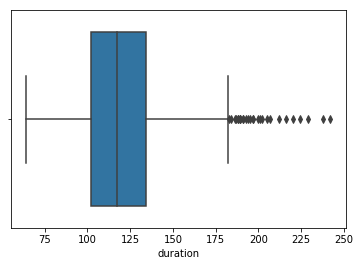

In [9]:
# Answer:
sns.boxplot(movies.duration)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies.groupby('star_rating')['title'].count()

star_rating
7.4     49
7.5    108
7.6    124
7.7    113
7.8    116
7.9     75
8.0     97
8.1    103
8.2     51
8.3     43
8.4     37
8.5     23
8.6     15
8.7     10
8.8      5
8.9      6
9.0      1
9.1      1
9.2      1
9.3      1
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

[Text(0,0.5,'Count of Titles'),
 Text(0.5,0,'Star Rating'),
 Text(0.5,1,'Count of Titles in Each Star Rating')]

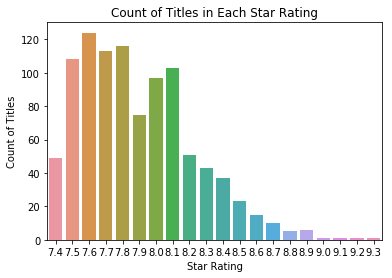

In [11]:
# Answer:
sns.countplot(movies.star_rating).set(ylabel='Count of Titles', xlabel='Star Rating', title='Count of Titles in Each Star Rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
print('Before cleaning #1: ', movies['content_rating'].unique())
movies.loc[:, 'content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'], ['UNRATED','UNRATED','UNRATED','UNRATED'], inplace=True)
print('After cleaning #1: ',movies['content_rating'].unique())

Before cleaning #1:  ['R' 'PG-13' 'NOT RATED' 'PG' 'UNRATED' 'APPROVED' 'PASSED' 'G' 'X' nan
 'TV-MA' 'GP' 'NC-17']
After cleaning #1:  ['R' 'PG-13' 'UNRATED' 'PG' 'G' 'X' nan 'TV-MA' 'NC-17']


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
print('Before cleaning #2: ', movies['content_rating'].unique())
movies.loc[:, 'content_rating'].replace(['X','TV-MA'], ['NC-17','NC-17'], inplace=True)
print('After cleaning #2: ', movies['content_rating'].unique())


Before cleaning #2:  ['R' 'PG-13' 'UNRATED' 'PG' 'G' 'X' nan 'TV-MA' 'NC-17']
After cleaning #2:  ['R' 'PG-13' 'UNRATED' 'PG' 'G' 'NC-17' nan]


#### Count the number of missing values in each column.

In [14]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [16]:
for _ in movies['title']:
    if _ == 'Butch Cassidy and the Sundance Kid':
        movies['content_rating'].fillna('PG', inplace=True, limit=1)
    if _ == 'Where Eagles Dare':
        movies['content_rating'].fillna('PG', inplace=True, limit=1)
    elif _ == 'True Grit':
        movies['content_rating'].fillna('G', inplace=True, limit=1)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [17]:
# Answer:
greater_than_or_equal_to_two_hours = movies['duration'] >= 120
less_than_two_hours = movies['duration'] < 120

print('Average star rating for movies atleast 2 hours long: ', movies[greater_than_or_equal_to_two_hours]['star_rating'].mean())
print('Average star rating for movies less than 2 hours long: ', movies[less_than_two_hours]['star_rating'].mean())
print('Difference between atleast 2 hours and less than 2 hours: ', movies[greater_than_or_equal_to_two_hours]['star_rating'].mean() - movies[less_than_two_hours]['star_rating'].mean())


Average star rating for movies atleast 2 hours long:  7.948898678414082
Average star rating for movies less than 2 hours long:  7.838666666666657
Difference between atleast 2 hours and less than 2 hours:  0.11023201174742514


#### Use a visualization to detect whether there is a relationship between duration and star rating.

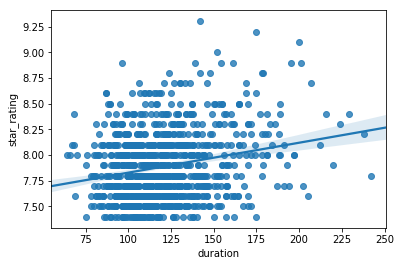

In [18]:
# Answer: 

sns.regplot(x=movies['duration'],y=movies['star_rating'],)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


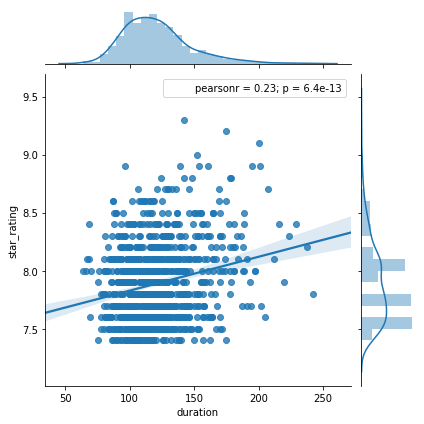

In [19]:
sns.jointplot(movies['duration'],movies['star_rating'], kind="reg")

#### Calculate the average duration for each genre.

In [20]:
# Answer:

movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

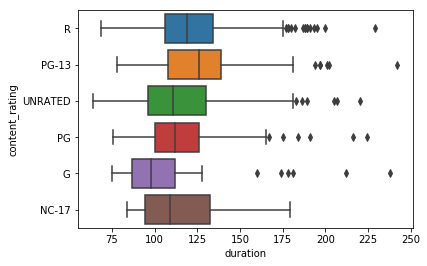

In [21]:
# Answer:

sns.boxplot(x=movies['duration'],y=movies['content_rating'])

#### Determine the top rated movie (by star rating) for each genre.

In [22]:
# Answer:
movies.groupby('genre')['title'].max(axis='star_rating')

genre
Action                                   Yojimbo
Adventure                              True Grit
Animation                         Wreck-It Ralph
Biography                          Walk the Line
Comedy                                Zombieland
Crime                                     Zodiac
Drama                                       Zulu
Family       Willy Wonka & the Chocolate Factory
Fantasy                The City of Lost Children
Film-Noir                          The Third Man
History                      Battleship Potemkin
Horror                                     [Rec]
Mystery                                  Vertigo
Sci-Fi             The Day the Earth Stood Still
Thriller               The Man Who Knew Too Much
Western                               Unforgiven
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [26]:
index = movies['title'].value_counts()[movies['title'].value_counts()>1].index
index
movies[movies['title'].isin(index)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [23]:
# Answer:


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [34]:
# Answer:
ten_movie_index = movies['genre'].value_counts()[movies['genre'].value_counts()>9].index
movies[movies['genre'].isin(ten_movie_index)].groupby('genre')['star_rating'].mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [25]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [26]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [27]:
movies['actors_list'].describe()

count                                                   979
unique                                                  969
top       [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
freq                                                      6
Name: actors_list, dtype: object

In [29]:
movies['actors_list'].value_counts()[movies['actors_list'].value_counts()>1]

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']        6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']          3
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                  2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']     2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']    2
Name: actors_list, dtype: int64

In [45]:
repeat_cast_index = movies['actors_list'].value_counts()[movies['actors_list'].value_counts()>1].index
movies[movies['actors_list'].isin(repeat_cast_index)]


,star_rating,title,content_rating,genre,duration,actors_list
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
80,8.4,Star Wars: Episode VI - Return of the Jedi,PG,Action,134,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
81,8.4,Toy Story 3,G,Animation,103,"[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']"
222,8.1,Harry Potter and the Deathly Hallows: Part 2,PG-13,Adventure,130,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
359,8.0,The Hobbit: The Desolation of Smaug,PG-13,Adventure,161,"[u'Ian McKellen', u'Martin Freeman', u'Richard..."
414,7.9,Toy Story 2,G,Animation,92,"[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']"
520,7.8,Back to the Future Part II,PG,Adventure,108,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
551,7.8,Harry Potter and the Prisoner of Azkaban,PG,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
